In [2]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import DataAnalyser2

file_name = "gps_soiree"

DataAnalyser2.process_gologic_csv(file_name)
df = pd.read_csv("Data/" + file_name + "_gologic_output-3.0.csv")
df.drop(['accumulated_us'], axis=1, inplace=True)
df.columns

Going to inconsistent state! Instant 01h41m21s, counter 1/24338 (0.00%), history 0:3 1:2 2:0 
Going to inconsistent state! Instant 01h41m22s, counter 2/24339 (0.01%), history 0:2 1:0 2:3 
Going to inconsistent state! Instant 02h26m02s, counter 3/35061 (0.01%), history 0:3 1:1 2:0 
Going to inconsistent state! Instant 02h26m03s, counter 4/35062 (0.01%), history 0:1 1:0 2:3 
Going to inconsistent state! Instant 03h04m37s, counter 5/44318 (0.01%), history 0:0 1:1 2:3 
Going to inconsistent state! Instant 03h04m37s, counter 6/44319 (0.01%), history 0:1 1:3 2:0 
Going to inconsistent state! Instant 03h30m51s, counter 7/50613 (0.01%), history 0:0 1:2 2:3 
Going to inconsistent state! Instant 03h30m51s, counter 8/50614 (0.02%), history 0:2 1:3 2:0 
Going to inconsistent state! Instant 04h20m59s, counter 9/62644 (0.01%), history 0:0 1:1 2:3 
Going to inconsistent state! Instant 04h20m59s, counter 10/62645 (0.02%), history 0:1 1:3 2:0 
Going to inconsistent state! Instant 04h30m27s, counter 11/

Index(['delay_us'], dtype='object')

Number of removed elements: delay_us    5
dtype: int64


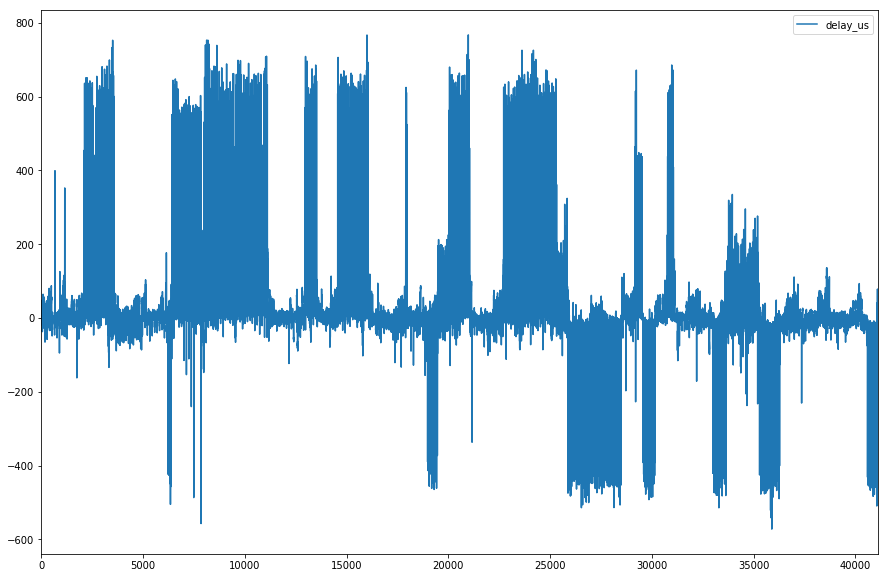

In [15]:
%matplotlib inline
plt.figure()

# remove some outliers
removed_elements_count = df.count()
df_no_outliers = df
coef = 10

mean = df.mean()
std = df.std()

df_no_outliers = df[df < mean + coef*std]
df_no_outliers = df_no_outliers[df > mean - coef*std]

removed_elements_count = removed_elements_count - df_no_outliers.count()
# df.iloc[10000:10100].plot(figsize=(15,10))
df_no_outliers.plot(figsize=(15,10))
print("Number of removed elements: {}".format(removed_elements_count))

In [5]:
df.std()

delay_us    95.142706
dtype: float64

In [6]:
df.mean()

delay_us    14.368545
dtype: float64

Text(0.5,1,'gps_soiree')

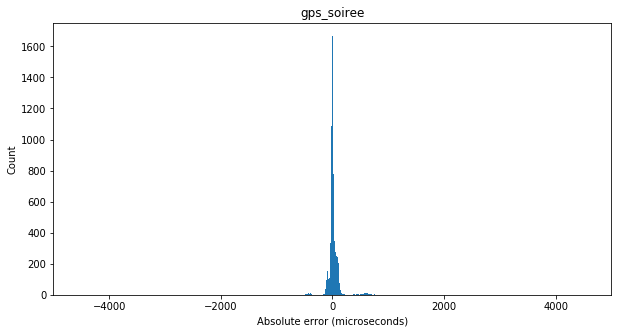

In [7]:
# df.delay_us = df.delay_us[df.delay_us < df.delay_us.mean() + 10*df.delay_us.std()]
# plt.figure()
# plot = zoom_in.hist(cumulative=True, bins=250, figsize=(20,5))
# plot.set_xlim(0,500)

bin_limit = 5000
step = 2.5
bins = list(np.arange(-bin_limit,bin_limit,step))

if df.delay_us.min() < -bin_limit:
    bins = [df.delay_us.min()] + bins
    
if df.delay_us.max() > bin_limit:
    bins = bins + [df.delay_us.max()]


plt.figure()
plot = df.delay_us.plot(kind="hist", cumulative=False, bins=bins, figsize=(10,5), density=False)
plot.set_xlim(-bin_limit, bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("Count")
plot.set_title(file_name)

Text(0.5,1,'gps_soiree')

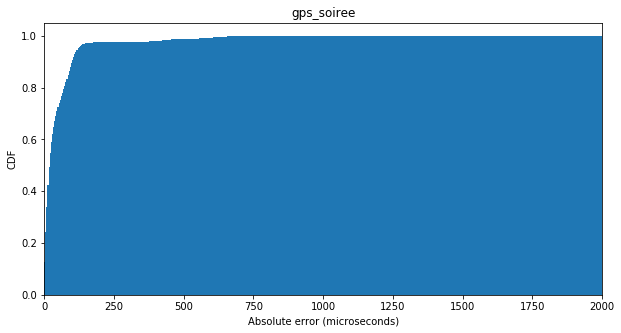

In [8]:
abs_delay = abs(df.delay_us)

bin_limit = 2000
step = 4
bins = list(np.arange(0,bin_limit,step))
    
if abs_delay.max() > bin_limit:
    bins = bins + [abs_delay.max()]


plt.figure()
plot = abs_delay.plot(kind="hist", cumulative=True, normed=1, bins=bins, figsize=(10,5))
plot.set_xlim(0,bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("CDF")
plot.set_title(file_name)




In [9]:
df.count()

delay_us    41136
dtype: int64

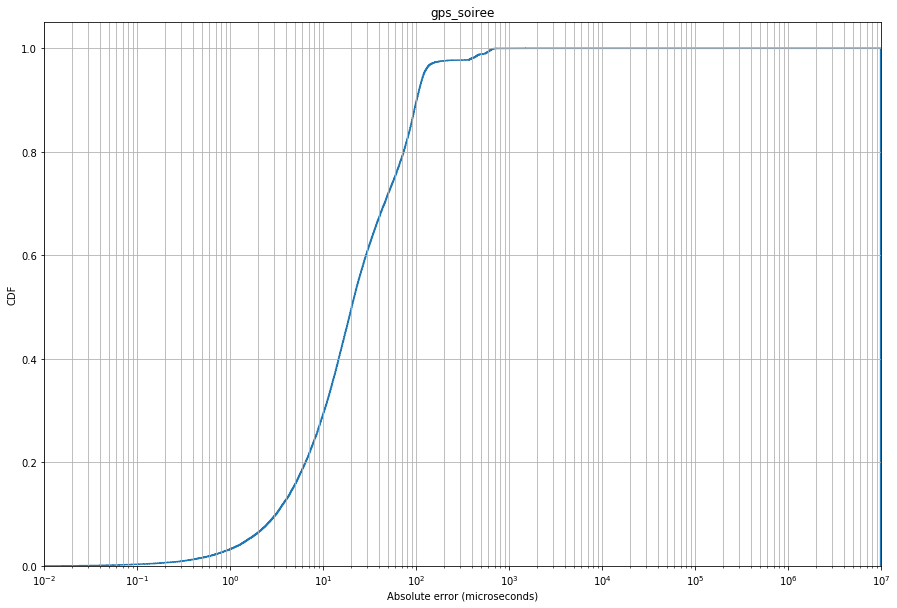

In [10]:
abs_delay = abs(df)

step = 10
# bins = list(np.arange(0,bin_limit,step))
bins = [10**x for x in np.arange(-3,7,0.005)]
    
# if abs_delay.max().max() > bins[-1]:
#     bins = bins + [abs_delay.max().max()/2, abs_delay.max().max()]
    
# bins = [0,10,20,100,1000000]
    
weights = abs_delay.div(abs_delay.sum(axis=0), axis=1)


plt.figure(figsize=(15,10))
plt.xscale("log")

for column in abs_delay.columns:
    data = abs_delay[column].dropna()
    _ = plt.hist(data, bins=bins, weights=np.ones_like(data)/data.count(), cumulative=True, histtype='step', fill=False, linewidth=1.5, alpha=1)

plt.xlim(0.01,10**7)
plt.xlabel("Absolute error (microseconds)")
plt.ylabel("CDF")
plt.title(file_name)
plt.legend(loc='lower right')

plt.grid(which="both")